In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
df = pd.read_csv('01_dataset.csv')

In [ ]:
df.describe()

,customer_id,label,SHORT_TERM_COUNT,MID_TERM_COUNT,LONG_TERM_COUNT,SHORT_TERM_COUNT_BANK,MID_TERM_COUNT_BANK,LONG_TERM_COUNT_BANK,SHORT_TERM_COUNT_NON_BANK,MID_TERM_COUNT_NON_BANK,...,ENQUIRIES_FROM_BANK_6M_9M,ENQUIRIES_FROM_BANK_9M_12M,ENQUIRIES_FROM_BANK_6M_12M,ENQUIRIES_FROM_BANK_3M_12M,ENQUIRIES_FROM_NON_BANK_3M_6M,ENQUIRIES_FROM_NON_BANK_6M_9M,ENQUIRIES_FROM_NON_BANK_9M_12M,ENQUIRIES_FROM_NON_BANK_6M_12M,ENQUIRIES_FROM_NON_BANK_3M_12M,OUTSTANDING_BAL_ALL_CURRENT
count,20000.000000,20000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,...,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,1.800000e+04
mean,12805.812050,0.182200,6.040667,3.316833,1.063333,3.177000,1.610500,1.061333,3.850500,2.730833,...,1.524688,1.956620,1.531301,1.013238,6.458641,6.591671,6.691829,6.402545,6.006104,1.000943e+06
std,7405.225854,0.386019,3.620554,3.147751,0.446094,2.211548,1.547231,0.437320,2.550394,2.519339,...,4.182101,4.304385,3.967109,3.560061,1.147119,1.022613,0.914260,1.177294,1.431080,4.007350e+03
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-3.000000,-3.000000,-3.000000,-3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000e+06
25%,6374.750000,0.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-3.000000,-3.000000,-3.000000,-3.000000,7.000000,7.000000,7.000000,7.000000,4.500000,1.000100e+06
50%,12840.500000,0.000000,7.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,7.000000,7.000000,7.000000,7.000000,7.000000,1.000290e+06
75%,19206.250000,0.000000,7.000000,4.000000,1.000000,4.000000,1.000000,1.000000,4.000000,4.000000,...,7.000000,7.000000,5.333333,3.000000,7.000000,7.000000,7.000000,7.000000,7.000000,1.000770e+06
max,25659.000000,1.000000,25.000000,25.000000,7.000000,13.000000,22.000000,7.000000,16.000000,19.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,1.169190e+06


In [ ]:
df.shape

(20000, 124)

In [ ]:
# df = data.copy(deep=True)
# my code
for col in df.select_dtypes('number').columns:
    df[col].fillna(df[col].mean(), inplace=True)

df.drop([ "CREDIT_CARD_MONTH_SINCE_10DPD","CREDIT_CARD_MONTH_SINCE_30DPD","CREDIT_CARD_MONTH_SINCE_60DPD","CREDIT_CARD_MONTH_SINCE_90DPD", 'CREDIT_CARD_NUMBER_OF_LATE_PAYMENT', 'OUTSTANDING_BAL_ALL_CURRENT'], inplace = True, axis = 1)

df_t = df[['SHORT_TERM_COUNT', 'MID_TERM_COUNT', 'LONG_TERM_COUNT', 'label']].copy(deep=True)
df_t['MANY_SHORT'] = np.where(df_t['SHORT_TERM_COUNT'] >= 4, 1, 0)
df_t['MANY_MID'] = np.where(df_t['MID_TERM_COUNT'] >= 4, 1, 0)
df_t['MANY_LONG'] = np.where(df_t['LONG_TERM_COUNT'] >= 4, 1, 0)
df_t['Theory 1'] = (df_t['MANY_SHORT'] * 10 + df_t['MANY_MID'] * 5 + df_t['MANY_LONG']) / 15
df['Diff_in_term_count'] = df_t['Theory 1']

df_t = df[['NUMBER_OF_LOANS', 'NUMBER_OF_LOANS_BANK', 'NUMBER_OF_LOANS_NON_BANK', 'label']].copy(deep=True)
df_t['MANY_LOANS'] = np.where(df_t['NUMBER_OF_LOANS'] >= 4, 1, 0)
df_t['MANY_LOANS_BANK'] = np.where(df_t['NUMBER_OF_LOANS_BANK'] >= 4, 1, 0)
df_t['MANY_LOANS_NON_BANK'] = np.where(df_t['NUMBER_OF_LOANS_NON_BANK'] >= 4, 1, 0)
df_t['Theory 1'] = df_t.iloc[:, -3:].sum(axis=1)
df['Diff_in_num_loan'] = df_t['Theory 1']

df_t = df[['NUMBER_OF_RELATIONSHIP', 'NUMBER_OF_RELATIONSHIP_BANK', 'NUMBER_OF_RELATIONSHIP_NON_BANK', 'label']].copy(deep=True)
# df_t.median()
df_t['MANY_RELATIONSHIP'] = np.where(df_t['NUMBER_OF_RELATIONSHIP'] >= 4, 1, 0)
df_t['MANY_RELATIONSHIP_BANK'] = np.where(df_t['NUMBER_OF_RELATIONSHIP_BANK'] >= 4, 1, 0)
df_t['MANY_RELATIONSHIP_NON_BANK'] = np.where(df_t['NUMBER_OF_RELATIONSHIP_NON_BANK'] >= 4, 1, 0)

df_t['Theory 1'] = (df_t['MANY_RELATIONSHIP'] * 5 + df_t['MANY_RELATIONSHIP_BANK'] + df_t['MANY_RELATIONSHIP_NON_BANK']) / 7
df['Diff_in_num_relationship'] = df_t['Theory 1']

cols = ['NUM_NEW_LOAN_TAKEN_3M', 'NUM_NEW_LOAN_TAKEN_6M',
       'NUM_NEW_LOAN_TAKEN_9M', 'NUM_NEW_LOAN_TAKEN_12M',
       'NUM_NEW_LOAN_TAKEN_BANK_3M', 'NUM_NEW_LOAN_TAKEN_BANK_6M',
       'NUM_NEW_LOAN_TAKEN_BANK_9M', 'NUM_NEW_LOAN_TAKEN_BANK_12M',
       'NUM_NEW_LOAN_TAKEN_NON_BANK_3M', 'NUM_NEW_LOAN_TAKEN_NON_BANK_6M',
       'NUM_NEW_LOAN_TAKEN_NON_BANK_9M', 'NUM_NEW_LOAN_TAKEN_NON_BANK_12M', 'label']
# cols = ['NUM_NEW_LOAN_TAKEN_3M', 'NUM_NEW_LOAN_TAKEN_6M',
#        'NUM_NEW_LOAN_TAKEN_9M', 'NUM_NEW_LOAN_TAKEN_12M', 'label']
df_t = df[cols].copy(deep=True)
df_t['MANY_NEW_LOAN_3M'] = np.where(df_t['NUM_NEW_LOAN_TAKEN_3M'] >= 1, 1, 0)
df_t['MANY_NEW_LOAN_6M'] = np.where(df_t['NUM_NEW_LOAN_TAKEN_6M'] >= 4, 1, 0)
df_t['MANY_NEW_LOAN_9M'] = np.where(df_t['NUM_NEW_LOAN_TAKEN_9M'] >= 4, 1, 0)
df_t['MANY_NEW_LOAN_12M'] = np.where(df_t['NUM_NEW_LOAN_TAKEN_12M'] >= 4, 1, 0)

df_t['MANY_NEW_LOAN_BANK_3M'] = np.where(df_t['NUM_NEW_LOAN_TAKEN_BANK_3M'] >= 1, 1, 0)
df_t['MANY_NEW_LOAN_BANK_6M'] = np.where(df_t['NUM_NEW_LOAN_TAKEN_BANK_6M'] >= 4, 1, 0)
df_t['MANY_NEW_LOAN_BANK_9M'] = np.where(df_t['NUM_NEW_LOAN_TAKEN_BANK_9M'] >= 4, 1, 0)
df_t['MANY_NEW_LOAN_BANK_12M'] = np.where(df_t['NUM_NEW_LOAN_TAKEN_BANK_12M'] >= 4, 1, 0)

df_t['MANY_NEW_LOAN_NON_BANK_3M'] = np.where(df_t['NUM_NEW_LOAN_TAKEN_NON_BANK_3M'] >= 1, 1, 0)
df_t['MANY_NEW_LOAN_NON_BANK_6M'] = np.where(df_t['NUM_NEW_LOAN_TAKEN_NON_BANK_6M'] >= 4, 1, 0)
df_t['MANY_NEW_LOAN_NON_BANK_9M'] = np.where(df_t['NUM_NEW_LOAN_TAKEN_NON_BANK_9M'] >= 4, 1, 0)
df_t['MANY_NEW_LOAN_NON_BANK_12M'] = np.where(df_t['NUM_NEW_LOAN_TAKEN_NON_BANK_12M'] >= 4, 1, 0)

df_t['Theory 1'] = df_t.iloc[:, -12:].sum(axis=1)
df['Diff_in_num_new_loan'] = df_t['Theory 1']

cols = ['SHORT_TERM_COUNT', 'MID_TERM_COUNT', 'LONG_TERM_COUNT', "SHORT_TERM_COUNT_BANK","MID_TERM_COUNT_BANK","LONG_TERM_COUNT_BANK","SHORT_TERM_COUNT_NON_BANK",
        "MID_TERM_COUNT_NON_BANK","LONG_TERM_COUNT_NON_BANK","NUMBER_OF_LOANS_BANK","NUMBER_OF_LOANS_NON_BANK", "NUMBER_OF_RELATIONSHIP","NUMBER_OF_RELATIONSHIP_BANK","NUMBER_OF_RELATIONSHIP_NON_BANK",
        'NUMBER_OF_LOANS', 'label']
df_t = df[cols].copy(deep=True)
# df_t['NUMBER_OF_LOANS'].fillna(df_t['NUMBER_OF_LOANS'].mean(), inplace=True)
df[['RATIO_SHORT', 'RATIO_MID', 'RATIO_LONG']] = \
df_t[['SHORT_TERM_COUNT', 'MID_TERM_COUNT', 'LONG_TERM_COUNT']].div(df_t['NUMBER_OF_LOANS'], axis=0)
df[['RATIO_SHORT_BANK', 'RATIO_MID_BANK', 'RATIO_LONG_BANK']] = \
df_t[['SHORT_TERM_COUNT_BANK', 'MID_TERM_COUNT_BANK', 'LONG_TERM_COUNT_BANK']].div(df_t['NUMBER_OF_LOANS_BANK'], axis=0)
df[['RATIO_SHORT_NON_BANK', 'RATIO_MID_NON_BANK', 'RATIO_LONG_NON_BANK']] = \
df_t[['SHORT_TERM_COUNT_NON_BANK', 'MID_TERM_COUNT_NON_BANK', 'LONG_TERM_COUNT_NON_BANK']].div(df_t['NUMBER_OF_LOANS_NON_BANK'], axis=0)
df[['RATIO_RELATIONSHIP']] = df_t[['NUMBER_OF_RELATIONSHIP']].div(df_t['NUMBER_OF_LOANS'], axis=0)
df[['RATIO_RELATIONSHIP_BANK']] = df_t[['NUMBER_OF_RELATIONSHIP_BANK']].div(df_t['NUMBER_OF_LOANS_BANK'], axis=0)
df[['RATIO_RELATIONSHIP_NON_BANK']] = df_t[['NUMBER_OF_RELATIONSHIP_NON_BANK']].div(df_t['NUMBER_OF_LOANS_NON_BANK'], axis=0)


<ipython-input-124-30355a109e87>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [ ]:
# warnings.simplefilter(action='ignore', category=FutureWarning)

# # Biểu đồ histogram
# def _plot_hist_subplot(x, fieldname, bins = 10, use_kde = True):
#   x = x.dropna()
#   xlabel = '{} bins tickers'.format(fieldname)
#   ylabel = 'Count obs in {} each bin'.format(fieldname)
#   title = 'histogram plot of {} with {} bins'.format(fieldname, bins)
#   ax = sns.distplot(x, bins = bins, kde = use_kde)
#   ax.set_xlabel(xlabel)
#   ax.set_ylabel(ylabel)
#   ax.set_title(title)
#   return ax

# # Biểu đồ barchart
# def _plot_barchart_subplot(x, fieldname):
#   xlabel = 'Group of {}'.format(fieldname)
#   ylabel = 'Count obs in {} each bin'.format(fieldname)
#   title = 'Barchart plot of {}'.format(fieldname)
#   x = x.fillna('Missing')
#   df_summary = x.value_counts(dropna = False)
#   y_values = df_summary.values
#   x_index = df_summary.index
#   ax = sns.barplot(x = x_index, y = y_values, order = x_index)
#   # Tạo vòng for lấy tọa độ đỉnh trên cùng của biểu đồ và thêm label thông qua annotate.
#   labels = list(set(x))
#   for label, p in zip(y_values, ax.patches):
#     ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.15))
#   plt.xlabel(xlabel)
#   plt.ylabel(ylabel)
#   plt.title(title)
#   return ax

# # Khởi tạo figure cho đồ thị (Kích thước W*H = 16x12) và cách nhau là 0.2 giữa các đồ thị
# fig = plt.figure(figsize=(18, 16))
# fig.subplots_adjust(hspace=0.5, wspace=0.2)
# # Tạo vòng for check định dạng của biến và visualize
# for i, (fieldname, dtype) in enumerate(zip(data.columns, data.dtypes.values)):
#   if i <= 11:
#     ax_i = fig.add_subplot(4, 3, i+1)
#     if dtype in ['float64', 'int64']:
#       ax_i = _plot_hist_subplot(data[fieldname], fieldname=fieldname)
#     else:
#       ax_i = _plot_barchart_subplot(data[fieldname], fieldname=fieldname)

# fig.suptitle('Visualization all fields')
# plt.show()

In [ ]:
col_reduced = ['customer_id', 'label', 'SHORT_TERM_COUNT', 'MID_TERM_COUNT',
       'LONG_TERM_COUNT', 'LONG_TERM_COUNT_NON_BANK', 'NUMBER_OF_LOANS_BANK',
       'NUMBER_OF_LOANS_NON_BANK', 'NUMBER_OF_CREDIT_CARDS',
       'NUMBER_OF_CREDIT_CARDS_NON_BANK', 'NUM_NEW_LOAN_TAKEN_3M',
       'OUTSTANDING_BAL_LOAN_CURRENT', 'OUTSTANDING_BAL_LOAN_3M_6M',
       'OUTSTANDING_BAL_CC_3M_6M', 'OUTSTANDING_BAL_ALL_9M_12M',
       'INCREASING_BAL_3M_LOAN', 'INCREASING_BAL_6M_LOAN', 'ENQUIRIES_3M',
       'ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M',
       'ENQUIRIES_FROM_NON_BANK_FOR_CC_3M', 'ENQUIRIES_3M_6M',
       'ENQUIRIES_6M_9M', 'ENQUIRIES_9M_12M', 'ENQUIRIES_FROM_BANK_6M_9M',
       'Diff_in_term_count', 'RATIO_SHORT', 'RATIO_SHORT_BANK',
       'RATIO_SHORT_NON_BANK', 'RATIO_MID_NON_BANK', 'RATIO_RELATIONSHIP',
       'RATIO_RELATIONSHIP_BANK', 'RATIO_RELATIONSHIP_NON_BANK']
data = df[col_reduced].copy(deep=True)
data.shape

(20000, 32)

In [ ]:
data.rename(columns={'label':'BAD'}, inplace=True)

In [ ]:
# add noise for qcut
data_with_noise = data.drop(columns=['customer_id',	'BAD']).applymap(lambda x: x + np.random.normal(0, 1e-5))


<ipython-input-128-b993d3d29381>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_with_noise = data.drop(columns=['customer_id',	'BAD']).applymap(lambda x: x + np.random.normal(0, 1e-5))


In [ ]:
data = pd.concat([data[['customer_id',	'BAD']], data_with_noise], axis=1)

## Bin table

In [ ]:
# now
MAX_VAL = 999999999
MIN_VAL = -MAX_VAL

def _bin_table(data, colname, n_bins = 5, qcut = None):
  X = data[[colname, 'BAD']]
  X = X.sort_values(colname)
  coltype = X[colname].dtype

  if coltype in ['float', 'int']:
    if qcut is None:
      try:
        bins, thres = pd.qcut(X[colname], q = n_bins, retbins=True)
        # Thay thế threshold đầu và cuối của thres
        thres[0] = MIN_VAL
        thres[-1] = MAX_VAL
        bins, thres = pd.cut(X[colname], bins=thres, retbins=True)
        X['bins'] = bins
      except:
        print('n_bins must be lower to bin interval is valid!')
    else:
      bins, thres = pd.cut(X[colname], bins=qcut, retbins=True)
      X['bins'] = bins
  elif coltype == 'object':
    X['bins'] = X[colname]

  df_GB = pd.pivot_table(X,
                index = ['bins'],
                values = ['BAD'],
                columns = ['BAD'],
                aggfunc = {
                    'BAD':np.size
                })

  df_Count = pd.pivot_table(X,
                index = ['bins'],
                values = ['BAD'],
                aggfunc = {
                    'BAD': np.size
                })

  if coltype in ['float', 'int']:
    df_Thres = pd.DataFrame({'Thres':thres[1:]}, index=df_GB.index)
  elif coltype == 'object':
    df_Thres = pd.DataFrame(index=df_GB.index)
    thres = None
  df_Count.columns = ['No_Obs']
  df_GB.columns = ['#GOOD', '#BAD']
  df_summary = df_Thres.join(df_Count).join(df_GB)
  return df_summary, thres
df_summary, thres = _bin_table(data, 'SHORT_TERM_COUNT')
df_summary

<ipython-input-130-ab22ca9a43fd>:27: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_GB = pd.pivot_table(X,
<ipython-input-130-ab22ca9a43fd>:35: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_Count = pd.pivot_table(X,


,Thres,No_Obs,#GOOD,#BAD
bins,,,,
"(-999999999.0, 3.99999]",3.999991e+00,4000,2242,1758
"(3.99999, 4.00001]",4.000013e+00,4000,3408,592
"(4.00001, 6.99999]",6.999994e+00,4000,3383,617
"(6.99999, 9.99998]",9.999980e+00,4000,3600,400
"(9.99998, 999999999.0]",1.000000e+09,4000,3723,277


In [ ]:
df_summary, thres = _bin_table(data, 'OUTSTANDING_BAL_CC_3M_6M')
df_summary

<ipython-input-130-ab22ca9a43fd>:27: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_GB = pd.pivot_table(X,
<ipython-input-130-ab22ca9a43fd>:35: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_Count = pd.pivot_table(X,


,Thres,No_Obs,#GOOD,#BAD
bins,,,,
"(-999999999.0, 999990.0]",9.999900e+05,4000,3557,443
"(999990.0, 1000004.253]",1.000004e+06,4000,2283,1717
"(1000004.253, 1000009.333]",1.000009e+06,4000,3434,566
"(1000009.333, 1000011.561]",1.000012e+06,4000,3636,364
"(1000011.561, 999999999.0]",1.000000e+09,4000,3446,554


## WOE

In [ ]:
# NOW

def _WOE(data, colname, n_bins = 5, min_obs = 100, qcut = None):
  # Thống kê bins và lấy ra thres hold ban đầu
  df_summary, thres = _bin_table(data, colname, n_bins = n_bins, qcut = qcut)
  # Thay thế giá trị 0 của #BAD trong df_summary bằng 1 để không bị lỗi chia cho 0
  df_summary['#BAD'] = df_summary['#BAD'].replace({0:1})

  if qcut is not None:
    # Lọc bỏ threshold để tạo thành threshold mới mà thỏa mãn số lượng quan sát >= min_obs
    exclude_ind = np.where(df_summary['No_Obs'] <= min_obs)[0]
    if exclude_ind.shape[0] > 0:
      new_thres = np.delete(thres, exclude_ind)
      print('Auto combine {} bins into {} bins'.format(n_bins, new_thres.shape[0]-1))
      # Tính toán lại bảng summary
      df_summary, thres = _bin_table(data, colname, qcut=new_thres)

  new_thres = thres
  df_summary['GOOD/BAD'] = df_summary['#GOOD']/df_summary['#BAD']
  df_summary['%BAD'] = df_summary['#BAD']/df_summary['#BAD'].sum()
  df_summary['%GOOD'] = df_summary['#GOOD']/df_summary['#GOOD'].sum()
  df_summary['WOE'] = np.log(df_summary['%GOOD']/df_summary['%BAD'])
  df_summary['IV'] = (df_summary['%GOOD']-df_summary['%BAD'])*df_summary['WOE']
  df_summary['COLUMN'] = colname
  IV = df_summary['IV'].sum()
  print('Information Value of {} column: {}'.format(colname, IV))
  return df_summary, IV, new_thres

df_summary, IV, thres = _WOE(data, 'OUTSTANDING_BAL_CC_3M_6M', n_bins = 5, min_obs= 200)
df_summary

Information Value of OUTSTANDING_BAL_CC_3M_6M column: 0.5927368313000988


<ipython-input-130-ab22ca9a43fd>:27: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_GB = pd.pivot_table(X,
<ipython-input-130-ab22ca9a43fd>:35: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_Count = pd.pivot_table(X,


,Thres,No_Obs,#GOOD,#BAD,GOOD/BAD,%BAD,%GOOD,WOE,IV,COLUMN
bins,,,,,,,,,,
"(-999999999.0, 999990.0]",9.999900e+05,4000,3557,443,8.029345,0.121570,0.217474,0.581590,0.055777,OUTSTANDING_BAL_CC_3M_6M
"(999990.0, 1000004.253]",1.000004e+06,4000,2283,1717,1.329645,0.471186,0.139582,-1.216601,0.403429,OUTSTANDING_BAL_CC_3M_6M
"(1000004.253, 1000009.333]",1.000009e+06,4000,3434,566,6.067138,0.155324,0.209954,0.301374,0.016464,OUTSTANDING_BAL_CC_3M_6M
"(1000009.333, 1000011.561]",1.000012e+06,4000,3636,364,9.989011,0.099890,0.222304,0.799973,0.097927,OUTSTANDING_BAL_CC_3M_6M
"(1000011.561, 999999999.0]",1.000000e+09,4000,3446,554,6.220217,0.152031,0.210687,0.326292,0.019139,OUTSTANDING_BAL_CC_3M_6M


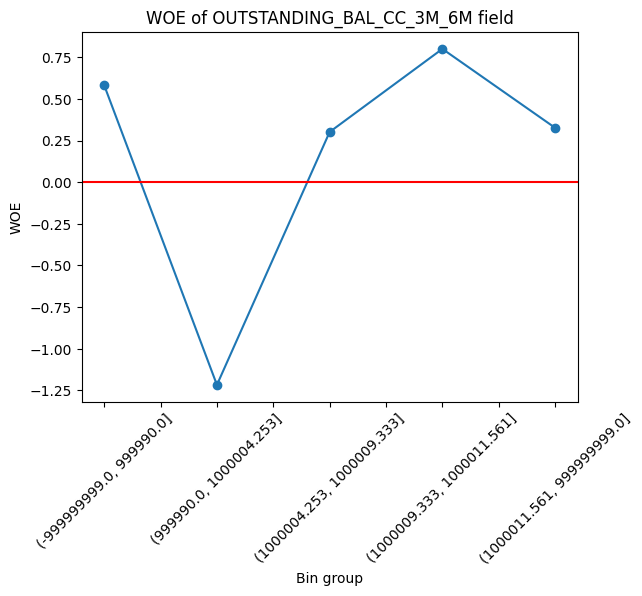

In [ ]:
def _plot(df_summary):
  colname = list(df_summary['COLUMN'].unique())[0]
  df_summary['WOE'].plot(linestyle='-', marker='o')
  plt.title('WOE of {} field'.format(colname))
  plt.axhline(y=0, color = 'red')
  plt.xticks(rotation=45)
  plt.ylabel('WOE')
  plt.xlabel('Bin group')

_plot(df_summary)

## WOE dict

In [ ]:
# NOW

WOE_dict=dict()
# nbins = {'LOAN': 10, 'MORTDUE': 10, 'VALUE': 10, 'YOJ':10, 'CLAGE':10, 'NINQ': 2, 'CLNO':10, 'DEBTINC':7}
for col in data.columns.drop(['customer_id', 'BAD']):
  df_summary, IV, thres = _WOE(data, colname=col)
  WOE_dict[col] = {'table':df_summary, 'IV':IV}

<ipython-input-130-ab22ca9a43fd>:27: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_GB = pd.pivot_table(X,
<ipython-input-130-ab22ca9a43fd>:35: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_Count = pd.pivot_table(X,
<ipython-input-130-ab22ca9a43fd>:27: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_GB = pd.pivot_table(X,
<ipython-input-130-ab22ca9a43fd>:35: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify obse

Information Value of SHORT_TERM_COUNT column: 0.696544819048301
Information Value of MID_TERM_COUNT column: 0.16066050359817288
Information Value of LONG_TERM_COUNT column: 0.0038253197105818358
Information Value of LONG_TERM_COUNT_NON_BANK column: 0.0007095247285931692


<ipython-input-130-ab22ca9a43fd>:27: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_GB = pd.pivot_table(X,
<ipython-input-130-ab22ca9a43fd>:35: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_Count = pd.pivot_table(X,
<ipython-input-130-ab22ca9a43fd>:27: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_GB = pd.pivot_table(X,
<ipython-input-130-ab22ca9a43fd>:35: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify obse

Information Value of NUMBER_OF_LOANS_BANK column: 0.5524560153043041
Information Value of NUMBER_OF_LOANS_NON_BANK column: 0.556699143735495
Information Value of NUMBER_OF_CREDIT_CARDS column: 0.33107668740841745
Information Value of NUMBER_OF_CREDIT_CARDS_NON_BANK column: 0.03297365259653359
Information Value of NUM_NEW_LOAN_TAKEN_3M column: 0.25596457454549837


<ipython-input-130-ab22ca9a43fd>:27: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_GB = pd.pivot_table(X,
<ipython-input-130-ab22ca9a43fd>:35: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_Count = pd.pivot_table(X,
<ipython-input-130-ab22ca9a43fd>:27: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_GB = pd.pivot_table(X,
<ipython-input-130-ab22ca9a43fd>:35: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify obse

Information Value of OUTSTANDING_BAL_LOAN_CURRENT column: 0.549562859835303
Information Value of OUTSTANDING_BAL_LOAN_3M_6M column: 0.49887453544920624
Information Value of OUTSTANDING_BAL_CC_3M_6M column: 0.5927368313000988
Information Value of OUTSTANDING_BAL_ALL_9M_12M column: 0.30640326343257646


<ipython-input-130-ab22ca9a43fd>:27: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_GB = pd.pivot_table(X,
<ipython-input-130-ab22ca9a43fd>:35: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_Count = pd.pivot_table(X,
<ipython-input-130-ab22ca9a43fd>:27: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_GB = pd.pivot_table(X,
<ipython-input-130-ab22ca9a43fd>:35: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify obse

Information Value of INCREASING_BAL_3M_LOAN column: 0.01981079933347499
Information Value of INCREASING_BAL_6M_LOAN column: 0.03441798224976655
Information Value of ENQUIRIES_3M column: 0.04164434614291341
Information Value of ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M column: 0.02944532782868287
Information Value of ENQUIRIES_FROM_NON_BANK_FOR_CC_3M column: 0.001229793997593001


<ipython-input-130-ab22ca9a43fd>:27: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_GB = pd.pivot_table(X,
<ipython-input-130-ab22ca9a43fd>:35: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_Count = pd.pivot_table(X,
<ipython-input-130-ab22ca9a43fd>:27: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_GB = pd.pivot_table(X,
<ipython-input-130-ab22ca9a43fd>:35: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify obse

Information Value of ENQUIRIES_3M_6M column: 0.005436253714599636
Information Value of ENQUIRIES_6M_9M column: 0.005160643099792401
Information Value of ENQUIRIES_9M_12M column: 0.005252221516670458
Information Value of ENQUIRIES_FROM_BANK_6M_9M column: 0.3396421904240452


<ipython-input-130-ab22ca9a43fd>:27: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_GB = pd.pivot_table(X,
<ipython-input-130-ab22ca9a43fd>:35: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_Count = pd.pivot_table(X,
<ipython-input-130-ab22ca9a43fd>:27: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_GB = pd.pivot_table(X,
<ipython-input-130-ab22ca9a43fd>:35: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify obse

Information Value of Diff_in_term_count column: 0.6064862062219061
Information Value of RATIO_SHORT column: 0.13430549378160742
Information Value of RATIO_SHORT_BANK column: 0.041380780657667655
Information Value of RATIO_SHORT_NON_BANK column: 0.0858421552771981
Information Value of RATIO_MID_NON_BANK column: 0.25275203896512943
Information Value of RATIO_RELATIONSHIP column: 0.22497304986013186
Information Value of RATIO_RELATIONSHIP_BANK column: 0.29604283139533194
Information Value of RATIO_RELATIONSHIP_NON_BANK column: 0.04309541900968045


<ipython-input-130-ab22ca9a43fd>:35: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_Count = pd.pivot_table(X,
<ipython-input-130-ab22ca9a43fd>:27: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_GB = pd.pivot_table(X,
<ipython-input-130-ab22ca9a43fd>:35: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_Count = pd.pivot_table(X,
<ipython-input-130-ab22ca9a43fd>:27: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify o

In [ ]:
columns = []
IVs = []
for col in data.columns.drop(['BAD', 'customer_id']):
  columns.append(col)
  IVs.append(WOE_dict[col]['IV'])
df_WOE = pd.DataFrame({'column': columns, 'IV': IVs})

def _rank_IV(iv):
  if iv <= 0.02:
    return 'Useless'
  elif iv <= 0.1:
    return 'Weak'
  elif iv <= 0.3:
    return 'Medium'
  elif iv <= 0.5:
    return 'Strong'
  else:
    return 'Suspicious'

df_WOE['rank']=df_WOE['IV'].apply(lambda x: _rank_IV(x))
df_WOE.sort_values('IV', ascending=False)

,column,IV,rank
0,SHORT_TERM_COUNT,0.696545,Suspicious
22,Diff_in_term_count,0.606486,Suspicious
11,OUTSTANDING_BAL_CC_3M_6M,0.592737,Suspicious
5,NUMBER_OF_LOANS_NON_BANK,0.556699,Suspicious
4,NUMBER_OF_LOANS_BANK,0.552456,Suspicious
9,OUTSTANDING_BAL_LOAN_CURRENT,0.549563,Suspicious
10,OUTSTANDING_BAL_LOAN_3M_6M,0.498875,Strong
21,ENQUIRIES_FROM_BANK_6M_9M,0.339642,Strong
6,NUMBER_OF_CREDIT_CARDS,0.331077,Strong
12,OUTSTANDING_BAL_ALL_9M_12M,0.306403,Strong


In [ ]:
col_to_drop = list(df_WOE.loc[df_WOE['rank'] == 'Useless', 'column'])
df_WOE = df_WOE[df_WOE['rank'] != 'Useless']
df_WOE[df_WOE['rank'] == 'Useless']

,column,IV,rank


In [ ]:
for col in col_to_drop:
  del WOE_dict[col]
data.drop(columns=col_to_drop, inplace=True)

In [ ]:
len(WOE_dict.keys())

23

In [ ]:
len(df_WOE)

23

In [ ]:
data.shape

(20000, 25)

## Logistic

In [ ]:
for col in WOE_dict.keys():
  try:
    key = list(WOE_dict[col]['table']['WOE'].index)
    woe = list(WOE_dict[col]['table']['WOE'])
    d = dict(zip(key, woe))
    col_woe = col+'_WOE'
    data[col_woe] = data[col].map(d)
  except:
    print(col)

In [ ]:
data.isna().sum().sort_values().tail(10)

,0
ENQUIRIES_3M,0
ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M,0
ENQUIRIES_FROM_BANK_6M_9M,0
Diff_in_term_count,0
RATIO_SHORT,0
RATIO_SHORT_BANK,0
RATIO_SHORT_NON_BANK,0
RATIO_MID_NON_BANK,0
RATIO_RELATIONSHIP_BANK_WOE,0
RATIO_RELATIONSHIP_NON_BANK_WOE,0


In [ ]:
X = data.filter(like='_WOE', axis = 1)
y = data['BAD']

In [ ]:
from sklearn.model_selection import train_test_split

ids = np.arange(X.shape[0])
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X, y, ids, test_size = 0.2, stratify = y, shuffle = True, random_state = 123)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (16000, 23)
X_test shape:  (4000, 23)
y_train shape:  (16000,)
y_test shape:  (4000,)


In [ ]:
id_test

array([18777, 16588, 11602, ...,  9555,  9909,  8651])

In [ ]:
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression(solver = 'lbfgs', max_iter=10000, fit_intercept=True, tol=0.0001, C=1, penalty='l2')
logit_model.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=10000)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_train = logit_model.predict(X_train)
acc_train = accuracy_score(y_pred_train, y_train)
y_pred_test = logit_model.predict(X_test)
acc_test = accuracy_score(y_pred_test, y_test)

print('accuracy on train: ', acc_train)
print('accuracy on test: ', acc_test)

accuracy on train:  0.881875
accuracy on test:  0.87625


<ipython-input-148-352645904371>:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-148-352645904371>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


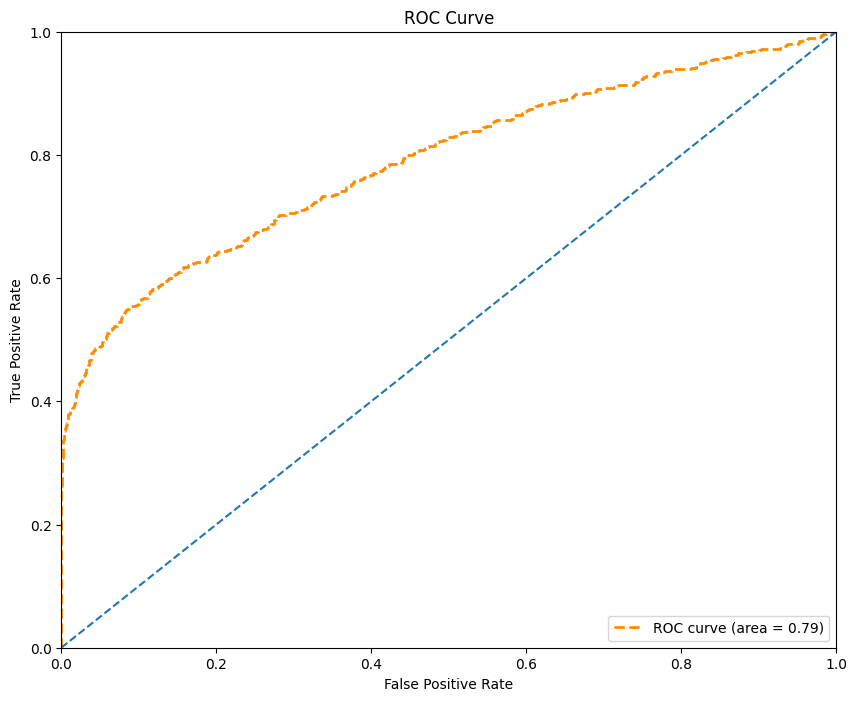

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_prob_test = logit_model.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

_plot_roc_curve(fpr, tpr, thres, roc_auc)

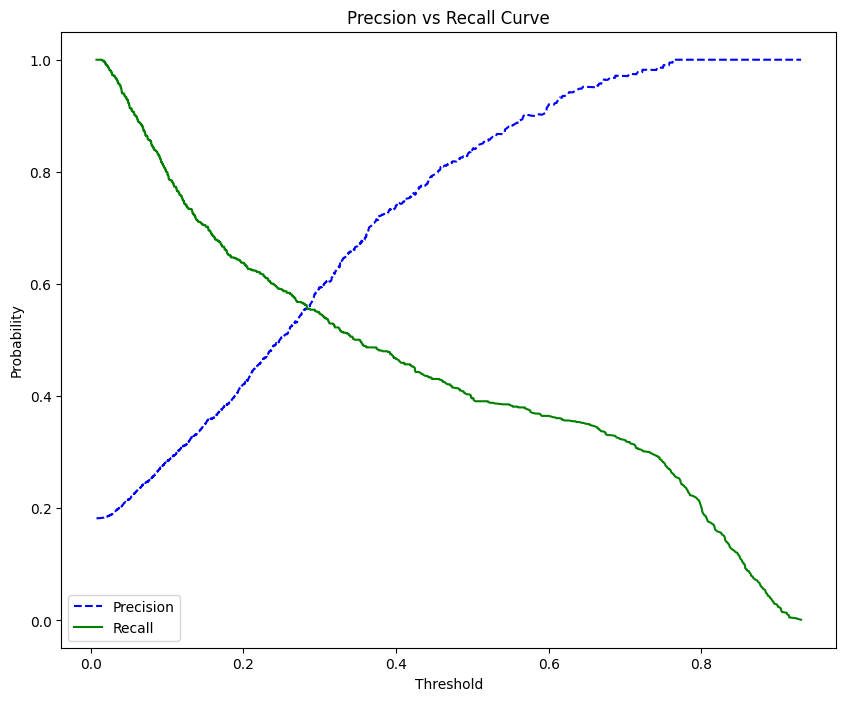

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thres = precision_recall_curve(y_test, y_pred_prob_test)

def _plot_prec_rec_curve(prec, rec, thres):
    plt.figure(figsize = (10, 8))
    plt.plot(thres, prec[:-1], 'b--', label = 'Precision')
    plt.plot(thres, rec[:-1], 'g-', label = 'Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Probability')
    plt.title('Precsion vs Recall Curve')
    plt.legend()

_plot_prec_rec_curve(precision, recall, thres)

In [ ]:
def _KM(y_pred, n_bins):
  _, thresholds = pd.qcut(y_pred, q=n_bins, retbins=True)
  cmd_BAD = []
  cmd_GOOD = []
  BAD_id = set(np.where(y_test == 0)[0])
  GOOD_id = set(np.where(y_test == 1)[0])
  total_BAD = len(BAD_id)
  total_GOOD = len(GOOD_id)
  for thres in thresholds:
    pred_id = set(np.where(y_pred <= thres)[0])
    # Đếm % số lượng hồ sơ BAD có xác suất dự báo nhỏ hơn hoặc bằng thres
    per_BAD = len(pred_id.intersection(BAD_id))/total_BAD
    cmd_BAD.append(per_BAD)
    # Đếm % số lượng hồ sơ GOOD có xác suất dự báo nhỏ hơn hoặc bằng thres
    per_GOOD = len(pred_id.intersection(GOOD_id))/total_GOOD
    cmd_GOOD.append(per_GOOD)
  cmd_BAD = np.array(cmd_BAD)
  cmd_GOOD = np.array(cmd_GOOD)
  return cmd_BAD, cmd_GOOD, thresholds

cmd_BAD, cmd_GOOD, thresholds = _KM(y_pred_prob_test, n_bins=20)

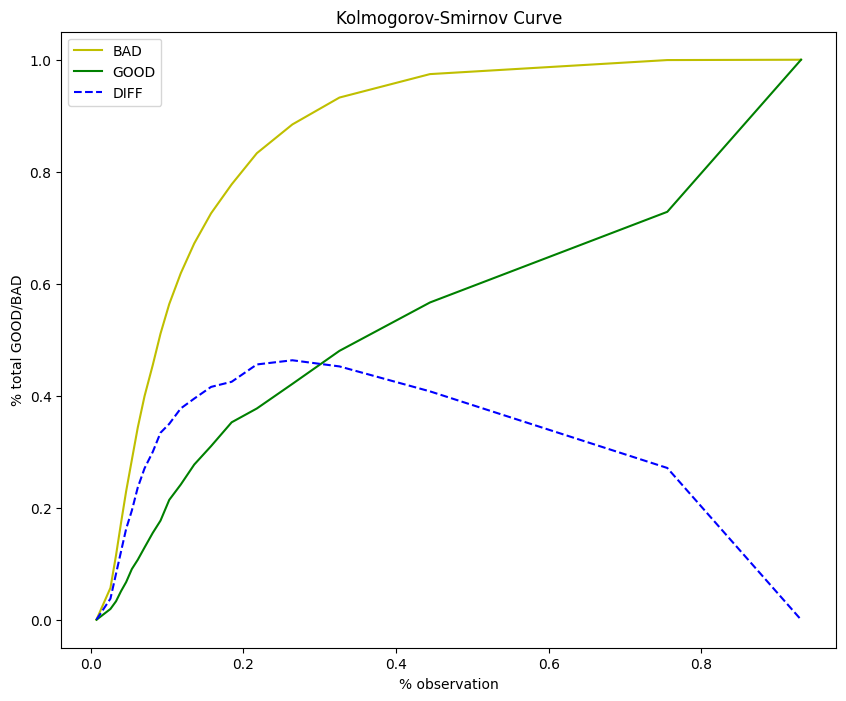

In [ ]:
def _plot_KM(cmd_BAD, cmd_GOOD, thresholds):
  plt.figure(figsize = (10, 8))
  plt.plot(thresholds, cmd_BAD, 'y-', label = 'BAD')
  plt.plot(thresholds, cmd_GOOD, 'g-', label = 'GOOD')
  plt.plot(thresholds, cmd_BAD-cmd_GOOD, 'b--', label = 'DIFF')
  plt.xlabel('% observation')
  plt.ylabel('% total GOOD/BAD')
  plt.title('Kolmogorov-Smirnov Curve')
  plt.legend()

_plot_KM(cmd_BAD, cmd_GOOD, thresholds)

In [ ]:
from scipy import stats

stats.ks_2samp(cmd_BAD, cmd_GOOD)

KstestResult(statistic=0.42857142857142855, pvalue=0.041088503979639056, statistic_location=0.42112482853223593, statistic_sign=-1)

In [ ]:
import numpy as np

def _CreditScore(beta, alpha, woe, n = 12, odds = 1/4, pdo = -50, thres_score = 600):
  factor = pdo/np.log(2)
  offset = thres_score - factor*np.log(odds)
  score = (beta*woe+alpha/n)*factor+offset/n
  return score

_CreditScore(beta = 0.5, alpha = -1, woe = 0.15, n = 12)

42.2677896003704

In [ ]:
betas_dict = dict(zip(list(X_train.columns), logit_model.coef_[0]))
alpha = logit_model.intercept_[0]
betas_dict

{'SHORT_TERM_COUNT_WOE': -0.14491670877791557,
 'MID_TERM_COUNT_WOE': -0.2738563055093224,
 'NUMBER_OF_LOANS_BANK_WOE': -0.46471949314327565,
 'NUMBER_OF_LOANS_NON_BANK_WOE': -0.4555617823884185,
 'NUMBER_OF_CREDIT_CARDS_WOE': -0.31162728046744553,
 'NUMBER_OF_CREDIT_CARDS_NON_BANK_WOE': 0.4392289051684083,
 'NUM_NEW_LOAN_TAKEN_3M_WOE': 0.04598177275625308,
 'OUTSTANDING_BAL_LOAN_CURRENT_WOE': -0.2697484149852485,
 'OUTSTANDING_BAL_LOAN_3M_6M_WOE': -0.3258467031924394,
 'OUTSTANDING_BAL_CC_3M_6M_WOE': -0.2210128952936824,
 'OUTSTANDING_BAL_ALL_9M_12M_WOE': -0.32587054650252384,
 'INCREASING_BAL_6M_LOAN_WOE': -0.38022108396728704,
 'ENQUIRIES_3M_WOE': 0.10441122453259451,
 'ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M_WOE': -0.06271518333617336,
 'ENQUIRIES_FROM_BANK_6M_9M_WOE': -0.5933048268405843,
 'Diff_in_term_count_WOE': -0.40150462323395647,
 'RATIO_SHORT_WOE': 0.008197311838754658,
 'RATIO_SHORT_BANK_WOE': -0.0019054119999181631,
 'RATIO_SHORT_NON_BANK_WOE': 0.4242111830234265,
 'RATIO_MI

## Score

In [ ]:
columns = list((set(columns) - set(col_to_drop)))

In [ ]:
len(columns)

23

In [ ]:
cols = []
features = []
woes = []
betas = []
scores = []

for col in columns:
  for feature, woe in WOE_dict[col]['table']['WOE'].to_frame().iterrows():
      cols.append(col)
      # Add feature
      feature = str(feature)
      features.append(feature)
      # Add woe
      woe = woe.values[0]
      woes.append(woe)
      # Add beta
      col_woe = col+'_WOE'
      beta = betas_dict[col_woe]
      betas.append(beta)
      # Add score
      score = _CreditScore(beta = beta, alpha = alpha, woe = woe, n = 12)
      scores.append(score)

df_WOE = pd.DataFrame({'Columns': cols, 'Features': features, 'WOE': woes, 'Betas':betas, 'Scores':scores})
df_WOE.head()

,Columns,Features,WOE,Betas,Scores
0,RATIO_SHORT_BANK,"(-999999999.0, 0.79424]",0.410544,-0.001905,49.894608
1,RATIO_SHORT_BANK,"(0.79424, 0.99999]",0.013142,-0.001905,49.839987
2,RATIO_SHORT_BANK,"(0.99999, 1.0]",-0.215332,-0.001905,49.808584
3,RATIO_SHORT_BANK,"(1.0, 1.00001]",-0.062834,-0.001905,49.829544
4,RATIO_SHORT_BANK,"(1.00001, 999999999.0]",-0.075688,-0.001905,49.827777


In [ ]:
# Giả sử một hồ sơ ngẫu nhiên có các thông số như sau
test_obs = data[columns].iloc[0:1, :]
test_obs

,RATIO_SHORT_BANK,NUMBER_OF_LOANS_NON_BANK,OUTSTANDING_BAL_CC_3M_6M,MID_TERM_COUNT,RATIO_SHORT,NUMBER_OF_CREDIT_CARDS_NON_BANK,RATIO_RELATIONSHIP_NON_BANK,NUMBER_OF_CREDIT_CARDS,ENQUIRIES_3M,ENQUIRIES_FROM_BANK_6M_9M,...,RATIO_SHORT_NON_BANK,OUTSTANDING_BAL_LOAN_CURRENT,OUTSTANDING_BAL_ALL_9M_12M,NUM_NEW_LOAN_TAKEN_3M,RATIO_RELATIONSHIP_BANK,INCREASING_BAL_6M_LOAN,SHORT_TERM_COUNT,RATIO_MID_NON_BANK,Diff_in_term_count,OUTSTANDING_BAL_LOAN_3M_6M
0,1.000011,1.000006,999999.999987,0.999992,0.999979,0.999997,1.000011,0.999997,7.000025,1.5247,...,0.999983,999999.999996,999999.999998,1.000006,1.000001,999999.999994,1.000001,0.999994,-0.000005,999999.999989


In [ ]:
def _search_score(obs, col):
  feature = [str(inter) for inter in list(WOE_dict[col]['table'].index) if obs[col].values[0] in inter][0]
  score = df_WOE[(df_WOE['Columns'] == col) & (df_WOE['Features'] == feature)]['Scores'].values[0]
  return score

# Tính điểm cho trường 'LOAN' của bộ hồ sơ test
score = _search_score(test_obs, 'SHORT_TERM_COUNT')
score

36.68427981919011

In [ ]:
def _total_score(obs, columns = columns):
  scores = dict()
  for col in columns:
    scores[col] = _search_score(obs, col)
  total_score = sum(scores.values())
  return scores, total_score

scores, total_score = _total_score(test_obs)

In [ ]:
total_score

940.0317389286927

In [ ]:
data.shape

(20000, 48)

In [ ]:
columns

['RATIO_SHORT_BANK',
 'NUMBER_OF_LOANS_NON_BANK',
 'OUTSTANDING_BAL_CC_3M_6M',
 'MID_TERM_COUNT',
 'RATIO_SHORT',
 'NUMBER_OF_CREDIT_CARDS_NON_BANK',
 'RATIO_RELATIONSHIP_NON_BANK',
 'NUMBER_OF_CREDIT_CARDS',
 'ENQUIRIES_3M',
 'ENQUIRIES_FROM_BANK_6M_9M',
 'ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M',
 'RATIO_RELATIONSHIP',
 'NUMBER_OF_LOANS_BANK',
 'RATIO_SHORT_NON_BANK',
 'OUTSTANDING_BAL_LOAN_CURRENT',
 'OUTSTANDING_BAL_ALL_9M_12M',
 'NUM_NEW_LOAN_TAKEN_3M',
 'RATIO_RELATIONSHIP_BANK',
 'INCREASING_BAL_6M_LOAN',
 'SHORT_TERM_COUNT',
 'RATIO_MID_NON_BANK',
 'Diff_in_term_count',
 'OUTSTANDING_BAL_LOAN_3M_6M']

In [ ]:
total_scores = []
data_test = data.copy()
for i in np.arange(data_test[columns].shape[0]):
  obs = data_test[columns].iloc[i:(i+1), :]
  _, score = _total_score(obs)
  total_scores.append(score)

data_test['Score'] = total_scores

<ipython-input-166-0a1ef1bed9cd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_test['Score'])
<ipython-input-166-0a1ef1bed9cd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_test[data_test['BAD']==1]['Score'], label='Default')
<ipython-input-166-0a1ef1bed9cd>:7: UserWarning: 

`di

Text(0.5, 1.0, 'Distribution Score in Default vs Non-Default')

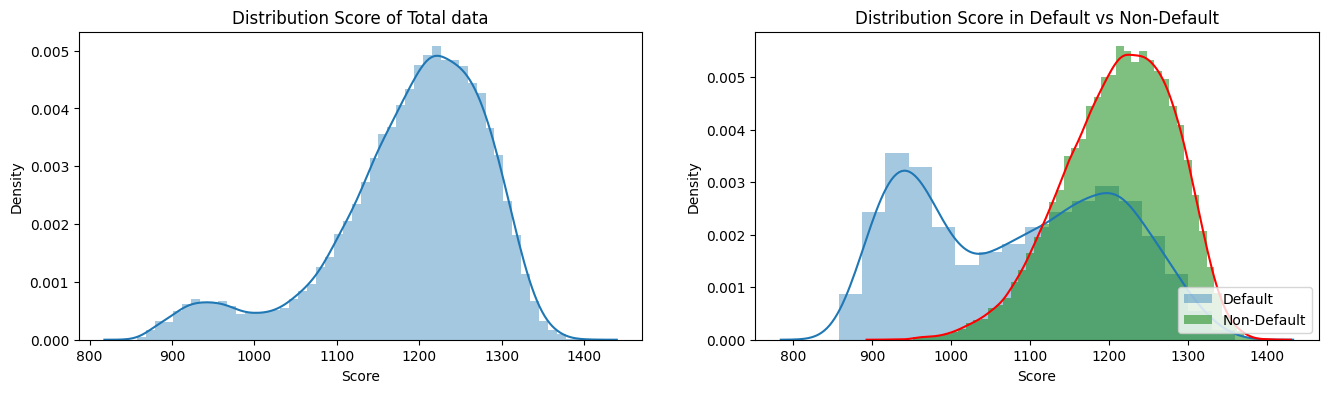

In [ ]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
sns.distplot(data_test['Score'])
plt.title('Distribution Score of Total data')
plt.subplot(122)
sns.distplot(data_test[data_test['BAD']==1]['Score'], label='Default')
sns.distplot(data_test[data_test['BAD']==0]['Score'], label='Non-Default',
             kde_kws={"color": "r"},
             hist_kws={"color": "g", "alpha":0.5})
plt.legend(loc = 'lower right')
plt.title('Distribution Score in Default vs Non-Default')

In [ ]:
data_test[['customer_id', 'BAD', 'Score']].to_csv("Score4_del_corr.csv")